# Employee Attrition Analysis


In [1]:
import os
os.chdir("D:\\University\\Pet projects\\HR\\hr-analytics-case-study")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

general_data = pd.read_csv("general_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")
manager_survey_data = pd.read_csv("manager_survey_data.csv")
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")

In [4]:
general_data.shape, employee_survey_data.shape, manager_survey_data.shape, in_time.shape, out_time.shape


((4410, 24), (4410, 4), (4410, 3), (4410, 262), (4410, 262))

In [5]:
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [7]:
general_data["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [8]:
general_data["EmployeeID"].nunique()

4410

In [9]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [10]:
employee_survey_data["EmployeeID"].nunique()

4410

In [11]:
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [12]:
manager_survey_data["EmployeeID"].nunique()

4410

In [13]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [14]:
in_time.shape

(4410, 262)

In [15]:
pd.isna(in_time).sum() #NA corresponds to Indian Public holidays

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
2015-01-08     243
2015-01-09     215
2015-01-12     239
2015-01-13     265
2015-01-14    4410
2015-01-15     236
2015-01-16     264
2015-01-19     228
2015-01-20     241
2015-01-21     240
2015-01-22     240
2015-01-23     249
2015-01-26    4410
2015-01-27     217
2015-01-28     212
2015-01-29     276
2015-01-30     208
2015-02-02     208
2015-02-03     206
2015-02-04     212
2015-02-05     211
2015-02-06     211
2015-02-09     224
2015-02-10     219
              ... 
2015-11-20     206
2015-11-23     247
2015-11-24     210
2015-11-25     216
2015-11-26     270
2015-11-27     242
2015-11-30     243
2015-12-01     210
2015-12-02     244
2015-12-03     228
2015-12-04     235
2015-12-07     226
2015-12-08     221
2015-12-09     223
2015-12-10     216
2015-12-11     220
2015-12-14     234
2015-12-15     254
2015-12-16     227
2015-12-17     207
2015-12-18     239
2015-12-21  

In [16]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

In [17]:
out_time.columns

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [18]:
type(in_time.columns)

pandas.core.indexes.base.Index

In [19]:
type(list(in_time.columns))

list

In [20]:
melted_time = in_time.melt(id_vars = "Unnamed: 0",
                              value_vars = list(in_time.columns).remove("Unnamed: 0"),
                              var_name = "Date", value_name = "Time")

In [21]:
melted_time.head()

Unnamed: 0        Date Time
0           1  2015-01-01  NaN
1           2  2015-01-01  NaN
2           3  2015-01-01  NaN
3           4  2015-01-01  NaN
4           5  2015-01-01  NaN

In [22]:
melted_time_out = out_time.melt(id_vars = "Unnamed: 0",
                              value_vars = list(out_time.columns).remove("Unnamed: 0"),
                              var_name = "Date", value_name = "out_time")

In [23]:
melted_time_out.head()

Unnamed: 0        Date out_time
0           1  2015-01-01      NaN
1           2  2015-01-01      NaN
2           3  2015-01-01      NaN
3           4  2015-01-01      NaN
4           5  2015-01-01      NaN

In [24]:
master_time = pd.merge(melted_time,
                      melted_time_out,
                      on = ["Unnamed: 0", "Date"],
                      how = "inner")

In [25]:
master_time.shape

(1151010, 4)

In [26]:
master_time.columns

Index(['Unnamed: 0', 'Date', 'Time', 'out_time'], dtype='object')

In [27]:
master_time['in_time_0'] = pd.to_datetime(master_time['Time'])
master_time['out_time_0'] = pd.to_datetime(master_time['out_time'])

In [28]:
master_time1 = master_time.dropna()
master_time1.shape

(1041930, 6)

In [29]:
import numpy as np
master_time1['total_time'] = ((master_time1['out_time_0'] - master_time1['in_time_0'])/np.timedelta64(1,'h'))

In [30]:
master_time1.head()

Unnamed: 0        Date                 Time             out_time  \
4410           1  2015-01-02  2015-01-02 09:43:45  2015-01-02 16:56:15   
4411           2  2015-01-02  2015-01-02 10:15:44  2015-01-02 18:22:17   
4412           3  2015-01-02  2015-01-02 10:17:41  2015-01-02 16:59:14   
4413           4  2015-01-02  2015-01-02 10:05:06  2015-01-02 17:25:24   
4414           5  2015-01-02  2015-01-02 10:28:17  2015-01-02 18:31:37   

               in_time_0          out_time_0  total_time  
4410 2015-01-02 09:43:45 2015-01-02 16:56:15    7.208333  
4411 2015-01-02 10:15:44 2015-01-02 18:22:17    8.109167  
4412 2015-01-02 10:17:41 2015-01-02 16:59:14    6.692500  
4413 2015-01-02 10:05:06 2015-01-02 17:25:24    7.338333  
4414 2015-01-02 10:28:17 2015-01-02 18:31:37    8.055556

In [31]:
master_time1.rename(columns = {"Unnamed: 0": "EmployeeID"}, inplace = True)

In [32]:
master_time_final = master_time1[['EmployeeID', 'total_time']]
master_time_final.head()

EmployeeID  total_time
4410           1    7.208333
4411           2    8.109167
4412           3    6.692500
4413           4    7.338333
4414           5    8.055556

In [33]:
master_time_final = master_time_final.groupby('EmployeeID', as_index= False).agg({"total_time": "mean"})

In [34]:
master_time_final.shape

(4410, 2)

In [35]:
master_time_final.head()

EmployeeID  total_time
0           1    7.373651
1           2    7.718969
2           3    7.013240
3           4    7.193678
4           5    8.006175

In [36]:
master_data = pd.merge(pd.merge(pd.merge(general_data, master_time_final,
                      on = "EmployeeID",
                      how = "inner"),manager_survey_data,
                          on = "EmployeeID",
                          how = "inner"),employee_survey_data,
                            on = "EmployeeID",
                            how = "inner")                        

In [37]:
master_data['Attrition'] = np.where(master_data['Attrition'] == 'Yes', 1,0)

In [38]:
master_data.head()

Age  Attrition     BusinessTravel              Department  \
0   51          0      Travel_Rarely                   Sales   
1   31          1  Travel_Frequently  Research & Development   
2   32          0  Travel_Frequently  Research & Development   
3   38          0         Non-Travel  Research & Development   
4   32          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                 6          2  Life Sciences              1           1   
1                10          1  Life Sciences              1           2   
2                17          4          Other              1           3   
3                 2          5  Life Sciences              1           4   
4                10          1        Medical              1           5   

   Gender  ...  TrainingTimesLastYear YearsAtCompany YearsSinceLastPromotion  \
0  Female  ...                      6              1                       0   
1  Female  ...                      3              5                       1   
2    Male  ...                      2              5                       0   
3    Male  ...                      5              8                       7   
4    Male  ...                      2              6                       0   

   YearsWithCurrManager  total_time JobInvolvement  PerformanceRating  \
0                     0    7.373651              3                  3   
1                     4    7.718969              2                  4   
2                     3    7.013240              3                  3   
3                     5    7.193678              2                  3   
4                     4    8.006175              3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
0                      3.0              4.0              2.0  
1                      3.0              2.0              4.0  
2                      2.0              2.0              1.0  
3                      4.0              4.0              3.0  
4                      4.0              1.0              3.0  

[5 rows x 30 columns]

In [39]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int32
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-nu

In [40]:
master_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
total_time                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [41]:
master_data.EnvironmentSatisfaction = master_data.EnvironmentSatisfaction.fillna(master_data.EnvironmentSatisfaction.median())
master_data.JobSatisfaction = master_data.JobSatisfaction.fillna(master_data.JobSatisfaction.median())
master_data.WorkLifeBalance = master_data.WorkLifeBalance.fillna(master_data.WorkLifeBalance.median())
master_data.TotalWorkingYears = master_data.TotalWorkingYears.fillna(master_data.TotalWorkingYears.median())
master_data.NumCompaniesWorked = master_data.NumCompaniesWorked.fillna(1)

master_data.isna().sum() #check

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
total_time                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [42]:
pd.options.display.max_columns = None

master_data.head()

Age  Attrition     BusinessTravel              Department  \
0   51          0      Travel_Rarely                   Sales   
1   31          1  Travel_Frequently  Research & Development   
2   32          0  Travel_Frequently  Research & Development   
3   38          0         Non-Travel  Research & Development   
4   32          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                 6          2  Life Sciences              1           1   
1                10          1  Life Sciences              1           2   
2                17          4          Other              1           3   
3                 2          5  Life Sciences              1           4   
4                10          1        Medical              1           5   

   Gender  JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female         1  Healthcare Representative       Married         131160   
1  Female         1         Research Scientist        Single          41890   
2    Male         4            Sales Executive       Married         193280   
3    Male         3            Human Resources       Married          83210   
4    Male         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                 1.0      Y                 11              8   
1                 0.0      Y                 23              8   
2                 1.0      Y                 15              8   
3                 3.0      Y                 11              8   
4                 4.0      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  total_time  JobInvolvement  \
0                        0                     0    7.373651               3   
1                        1                     4    7.718969               2   
2                        0                     3    7.013240               3   
3                        7                     5    7.193678               2   
4                        0                     4    8.006175               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0

## EDA

In [43]:
master_data.describe()

Age    Attrition  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000  4410.000000       4410.000000  4410.000000         4410.0   
mean     36.923810     0.161224          9.192517     2.912925            1.0   
std       9.133301     0.367780          8.105026     1.023933            0.0   
min      18.000000     0.000000          1.000000     1.000000            1.0   
25%      30.000000     0.000000          2.000000     2.000000            1.0   
50%      36.000000     0.000000          7.000000     3.000000            1.0   
75%      43.000000     0.000000         14.000000     4.000000            1.0   
max      60.000000     1.000000         29.000000     5.000000            1.0   

        EmployeeID     JobLevel  MonthlyIncome  NumCompaniesWorked  \
count  4410.000000  4410.000000    4410.000000         4410.000000   
mean   2205.500000     2.063946   65029.312925            2.687528   
std    1273.201673     1.106689   47068.888559            2.495967   
min       1.000000     1.000000   10090.000000            0.000000   
25%    1103.250000     1.000000   29110.000000            1.000000   
50%    2205.500000     2.000000   49190.000000            2.000000   
75%    3307.750000     3.000000   83800.000000            4.000000   
max    4410.000000     5.000000  199990.000000            9.000000   

       PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
count        4410.000000         4410.0       4410.000000        4410.000000   
mean           15.209524            8.0          0.793878          11.277324   
std             3.659108            0.0          0.851883           7.774490   
min            11.000000            8.0          0.000000           0.000000   
25%            12.000000            8.0          0.000000           6.000000   
50%            14.000000            8.0          1.000000          10.000000   
75%            18.000000            8.0          1.000000          15.000000   
max            25.000000            8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager   total_time  JobInvolvement  PerformanceRating  \
count           4410.000000  4410.000000     4410.000000        4410.000000   
mean               4.123129     7.700792        2.729932           3.153741   
std                3.567327     1.340218        0.711400           0.360742   
min                0.000000     5.950504        1.000000           3.000000   
25%                2.000000     6.673333        2.000000           3.000000   
50%                3.000000     7.406761        3.000000           3.000000   
75%                7.000000     8.368703        3.000000           3.000000   
max               17.000000    11.030960        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
count              4410.000000      4410.000000      4410.000000  
mean                  2.725170         2.729478         2.763492  
std                   1.089852         1.098904         0.703541  
min                   1.000000         1.000000         1.000000  
25%                   2.000000         2.000000         2.000000  
50%                   3.000000         3.000000         3.000000  
75%                   4.000000         4.000000         3.000000  
max                   4.000

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
#histograms
col_names_hist = ['Age', 'DistanceFromHome','MonthlyIncome',
                  'NumCompaniesWorked','PercentSalaryHike',
                 'TotalWorkingYears',
                 'YearsAtCompany',
                 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                 'total_time']

fig, ax = plt.subplots(nrows = 5,ncols = 2, figsize=(10,15))
for i, col in enumerate(col_names_hist):
    sns.distplot(master_data[col], hist = True, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel('Frequency', fontsize=8)
fig.tight_layout(pad =  3.0)
plt.show()

<Figure size 1000x1500 with 10 Axes>

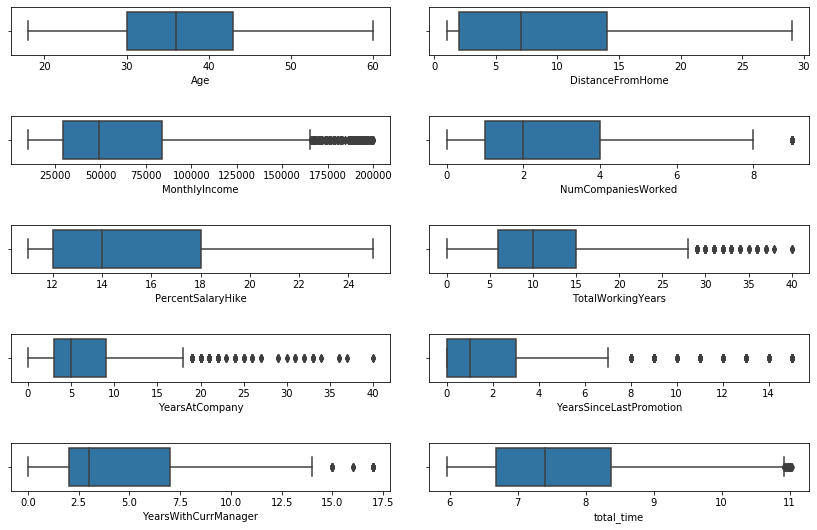

In [45]:
#Boxplots
#fig, ax = plt.subplots(len(col_names_hist), figsize=(12,5))
fig, ax = plt.subplots(nrows = 5, ncols =2, figsize=(12,8))
for i, col in enumerate(col_names_hist):
    sns.boxplot(master_data[col], ax=ax[i//2][i%2])
fig.tight_layout(pad =  3.0)
plt.show()

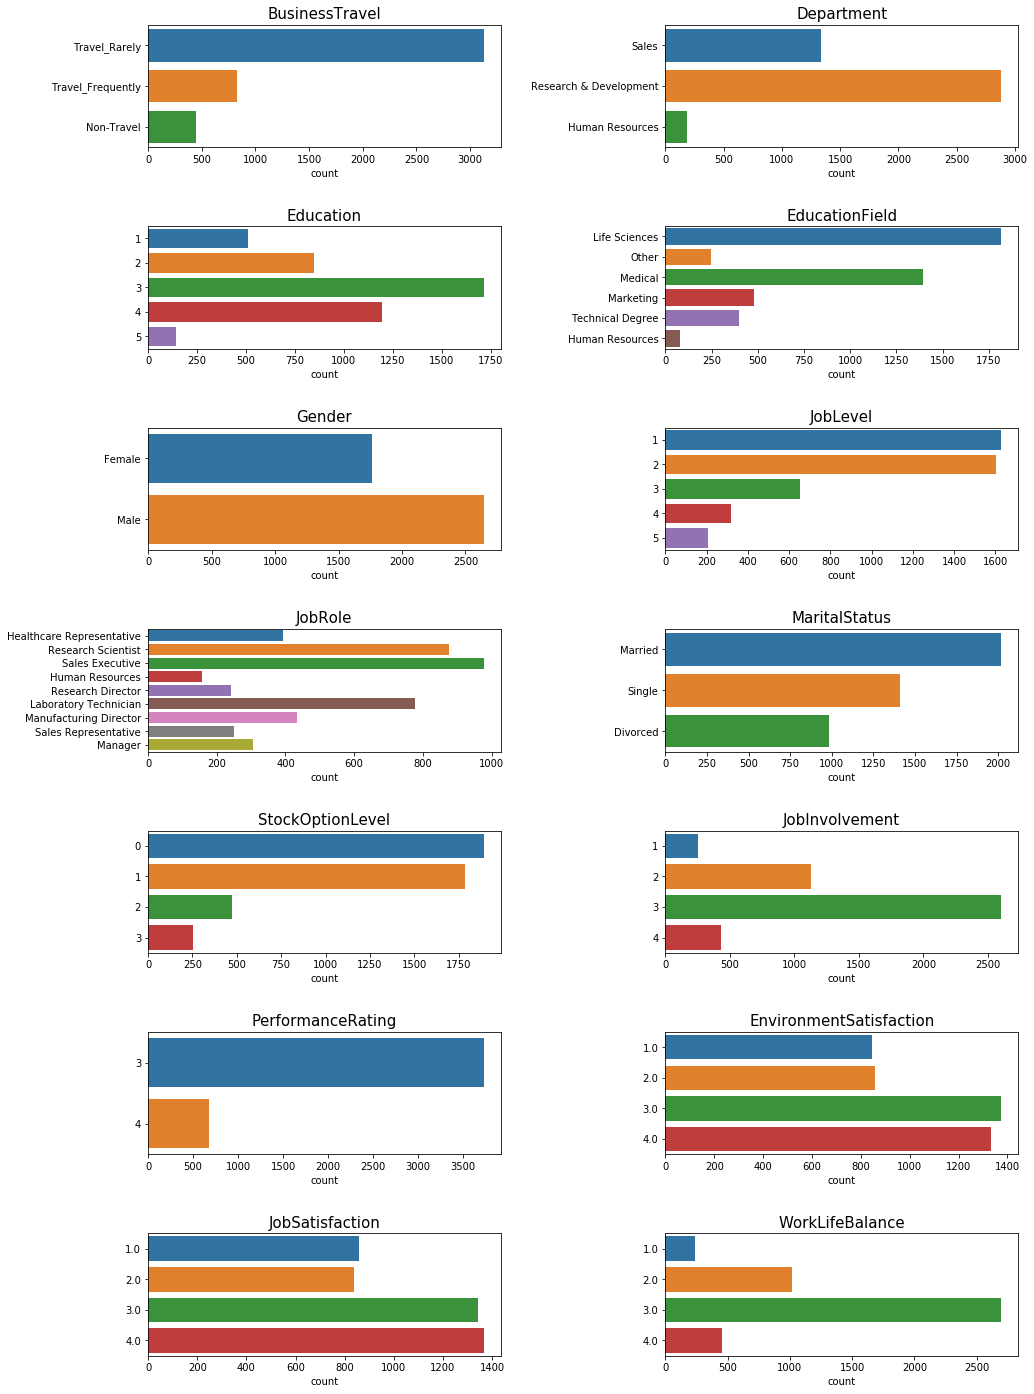

In [46]:
#Barplots
col_names_bar = ['BusinessTravel','Department',
                'Education','EducationField', 'Gender',
                'JobLevel', 'JobRole', 'MaritalStatus',
                'StockOptionLevel',
                'JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction',
                'JobSatisfaction','WorkLifeBalance']

fig_bar, ax = plt.subplots(nrows = 7, ncols=2,  figsize=(15,20))
for i, col in enumerate(col_names_bar):
    sns.countplot(y = master_data[col], ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title(col, fontsize=15)
    ax[i//2][i%2].set_ylabel("", fontsize=15)
fig_bar.tight_layout(pad = 3.0)
plt.show()

In [47]:
#correlation matrix
corr = master_data.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Key observations from the above table and plots: 
* 


Outlier Analysis:

Checking columns containing outliers in the above boxplots

In [48]:
from scipy import stats
#using Zscore method
z1 = np.abs(stats.zscore(master_data['MonthlyIncome']))
z2 = np.abs(stats.zscore(master_data['TotalWorkingYears']))
z3 = np.abs(stats.zscore(master_data['NumCompaniesWorked']))
z4 = np.abs(stats.zscore(master_data['YearsAtCompany']))

threshold = 3 #considering outliers only those values having a zscore > 3

In [49]:
print(np.where(z1 > 3)) #Monthly income #no outliers

(array([], dtype=int64),)


In [50]:
print(np.where(z2 > 3)) #Total working years

(array([  12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339], dtype=int64),)


In [51]:
# examining outlier values in total working years
master_data.YearsAtCompany.loc[[12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339]].describe()


count    48.000000
mean     18.375000
std      12.861992
min       5.000000
25%       8.500000
50%      10.000000
75%      32.250000
max      40.000000
Name: YearsAtCompany, dtype: float64

In [52]:
print(np.where(z3 > 3)) #Number of companies worked #no outliers

(array([], dtype=int64),)


In [53]:
print(np.where(z4 > 3)) #years at company

(array([  12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389], dtype=int64),)


In [54]:
# examining outlier values in years at company
master_data.YearsAtCompany.loc[[12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389]].describe()


count    75.000000
mean     31.320000
std       3.698648
min      26.000000
25%      29.000000
50%      32.000000
75%      33.000000
max      40.000000
Name: YearsAtCompany, dtype: float64

Data Cleaning:

In [55]:
master_data = master_data.drop(['Over18', 'EmployeeCount',
                                'EmployeeID', 'StandardHours'], axis = 1)
master_data.columns #give reason behind removing the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'total_time', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

Conclusion of the outlier analysis:

Based on the EDA, no abnormalily was observed in the dataset.

### Model Building

In [56]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int32
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4410 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-null int64
YearsSinceLastPromotion    4410 non-n

In [57]:
master_data['Attrition'].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [58]:
711/(3699+711) # data is moderately imbalanced with only ~16% '1' values 

0.16122448979591836

In [59]:
#Train-Test(80-20)% sampling
from sklearn.model_selection import train_test_split

x = master_data.drop('Attrition', axis =1)
y = master_data[['Attrition']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

In [60]:
y_train['Attrition'].value_counts(), y_test['Attrition'].value_counts()

(0    2959
 1     569
 Name: Attrition, dtype: int64, 0    740
 1    142
 Name: Attrition, dtype: int64)

In [61]:
# Converting categorical variables into dummy variables #train

def dummy_func(col_name):
    x = pd.get_dummies(x_train[col_name],drop_first=True, prefix = col_name, prefix_sep="_")
    return x

CBusinessTravel = dummy_func('BusinessTravel')
CDepartment = dummy_func('Department')
CEducationField = dummy_func('EducationField')
CGender = dummy_func('Gender')
CJobRole = dummy_func('JobRole')
CMaritalStatus = dummy_func('MaritalStatus')
CEducation = dummy_func('Education')
CJobLevel = dummy_func('JobLevel')

In [62]:
x_train.drop(['BusinessTravel',"Department","EducationField",'Gender','JobRole','MaritalStatus','Education','JobLevel'],axis=1,inplace=True)

x_train = pd.concat([x_train,CBusinessTravel,CDepartment,CEducationField,CGender,CJobRole,CMaritalStatus,CEducation,CJobLevel],axis=1)

x_train.head()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
216    24                 1          34070                 1.0   
1423   30                17          64300                 1.0   
2648   21                10          66870                 1.0   
3944   43                 1          76550                 9.0   
486    37                15          44850                 5.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
216                  15                 2                6.0   
1423                 12                 1               12.0   
2648                 19                 3                2.0   
3944                 12                 1                6.0   
486                  11                 1               15.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
216                       2               6                        1   
1423                      2              11                        5   
2648                      0               2                        1   
3944                      3               1                        0   
486                       2               1                        0   

      YearsWithCurrManager  total_time  JobInvolvement  PerformanceRating  \
216                      4    8.983127               2                  3   
1423                     8    7.985306               2                  3   
2648                     2    8.209698               3                  3   
3944                     0    8.400614               3                  3   
486                      0    6.590548               4                  3   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
216                       2.0              4.0              3.0   
1423                      3.0              3.0              3.0   
2648                      3.0              1.0              3.0   
3944                      3.0              3.0              3.0   
486                       1.0              2.0              1.0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
216                                  0                             1   
1423                                 0                             0   
2648                                 0                             1   
3944                                 1                             0   
486                                  0                             1   

      Department_Research & Development  Department_Sales  \
216                                   0                 1   
1423                                  1                 0   
2648                                  0                 1   
3944                                  1                 0   
486                                   0                 1   

      EducationField_Life Sciences  EducationField_Marketing  \
216                              0                         1   
1423                             1                         0   
2648                             0                         0   
3944                             0                         0   
486                              0                         1   

      EducationField_Medical  EducationField_Other  \
216                        0                     0   
1423                       0                     0   
2648                       1                     0   
3944                       0                     1   
486                        0                     0   

      EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
216                                 0            0                        0   
1423                                0            1                        0   
2648                                0            1                        0   
3944                                0            1                        0   
486                 

In [80]:
x_train.rename(columns = {"Department_Research & Development":"Department_RnD"}, inplace = True) #had to rename as an error was generated in the classification tree

In [64]:
# Converting categorical variables into dummy variables #test

def dummy_func(col_name):
    x = pd.get_dummies(x_test[col_name],drop_first=True, prefix = col_name, prefix_sep="_")
    return x

CBusinessTravel = dummy_func('BusinessTravel')
CDepartment = dummy_func('Department')
CEducationField = dummy_func('EducationField')
CGender = dummy_func('Gender')
CJobRole = dummy_func('JobRole')
CMaritalStatus = dummy_func('MaritalStatus')
CEducation = dummy_func('Education')
CJobLevel = dummy_func('JobLevel')

In [65]:
x_test.drop(['BusinessTravel',"Department","EducationField",'Gender','JobRole','MaritalStatus','Education','JobLevel'],axis=1,inplace=True)

x_test = pd.concat([x_test,CBusinessTravel,CDepartment,CEducationField,CGender,CJobRole,CMaritalStatus,CEducation,CJobLevel],axis=1)

x_test.head()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4026   37                 7          20110                 5.0   
156    24                27         104220                 1.0   
275    40                 3          51260                 5.0   
4396   45                18          58110                 0.0   
3220   41                 3          72600                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4026                 13                 0               16.0   
156                  17                 1                6.0   
275                  18                 0               20.0   
4396                 14                 0               25.0   
3220                 16                 0               22.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
4026                      4               5                        0   
156                       0               5                        1   
275                       2              18                        1   
4396                      4              24                        1   
3220                      2              22                        2   

      YearsWithCurrManager  total_time  JobInvolvement  PerformanceRating  \
4026                     4    8.723635               4                  3   
156                      4   10.648925               2                  3   
275                     12    8.616050               3                  3   
4396                     7    6.931283               2                  3   
3220                    10    6.219919               3                  3   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
4026                      4.0              1.0              3.0   
156                       1.0              2.0              3.0   
275                       4.0              1.0              3.0   
4396                      3.0              4.0              3.0   
3220                      4.0              3.0              3.0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
4026                                 0                             1   
156                                  0                             1   
275                                  1                             0   
4396                                 0                             1   
3220                                 0                             1   

      Department_Research & Development  Department_Sales  \
4026                                  1                 0   
156                                   1                 0   
275                                   1                 0   
4396                                  1                 0   
3220                                  1                 0   

      EducationField_Life Sciences  EducationField_Marketing  \
4026                             0                         0   
156                              0                         0   
275                              0                         0   
4396                             1                         0   
3220                             0                         0   

      EducationField_Medical  EducationField_Other  \
4026                       1                     0   
156                        1                     0   
275                        1                     0   
4396                       0                     0   
3220                       1                     0   

      EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
4026                                0            1                        0   
156                                 0            1                        0   
275                                 0            0                        1   
4396                                0            0                        0   
3220                

In [66]:
x_test.rename(columns = {"Department_Research & Development":"Department_RnD"}, inplace = True)

In [67]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
lgr.fit(x_train, y_train).coef_

array([[-2.92995918e-02, -2.25088349e-03, -2.21025511e-06,
         4.54106695e-03, -1.77252157e-03, -3.86256299e-04,
        -2.40638625e-02, -3.39616611e-03, -1.72518644e-02,
         4.22681070e-04, -1.45760869e-02,  6.40327772e-03,
        -1.14453569e-03, -9.09072378e-04, -4.91065777e-03,
        -5.03810567e-03, -2.66584596e-03,  1.39755465e-03,
        -8.75098428e-04, -3.90881070e-04, -5.01962778e-04,
         1.27492480e-04, -1.16370787e-04, -1.47585319e-04,
        -2.04265014e-04, -4.03817922e-04,  2.39953742e-05,
        -9.83952985e-05, -1.76386466e-04, -1.38771779e-04,
        -4.22812977e-04,  2.84591013e-04,  3.33172136e-04,
         6.39551617e-05, -1.30763440e-04, -1.64539149e-03,
         2.36639799e-03,  1.33417965e-04, -2.02285641e-04,
        -3.45106505e-04, -9.09117518e-05,  5.93551971e-04,
        -3.48324475e-04,  6.50938774e-05, -2.21071985e-04]])

In [69]:
# in-sample prediction
y_pred = lgr.predict(x_train)
lgr.score(x_train, y_train)

0.838718820861678

In [70]:
#out of sample prediction
y_pred_test = lgr.predict(x_test)
lgr.score(x_test, y_test)

0.8390022675736961

In [71]:
#pd.DataFrame(y_pred_test).describe()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_pred)) #train data

[[2959    0]
 [ 569    0]]


In [72]:
print(confusion_matrix(y_test, y_pred_test)) #test data

[[740   0]
 [142   0]]


In [122]:
# classification tree
from sklearn.datasets import load_iris
from sklearn import treee

clf = treee.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
#tree.plot_tree(clf.fit(x_train, y_train)) 

In [75]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files (x86)\Graphviz2.38\bin"

C:\Users\hasna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


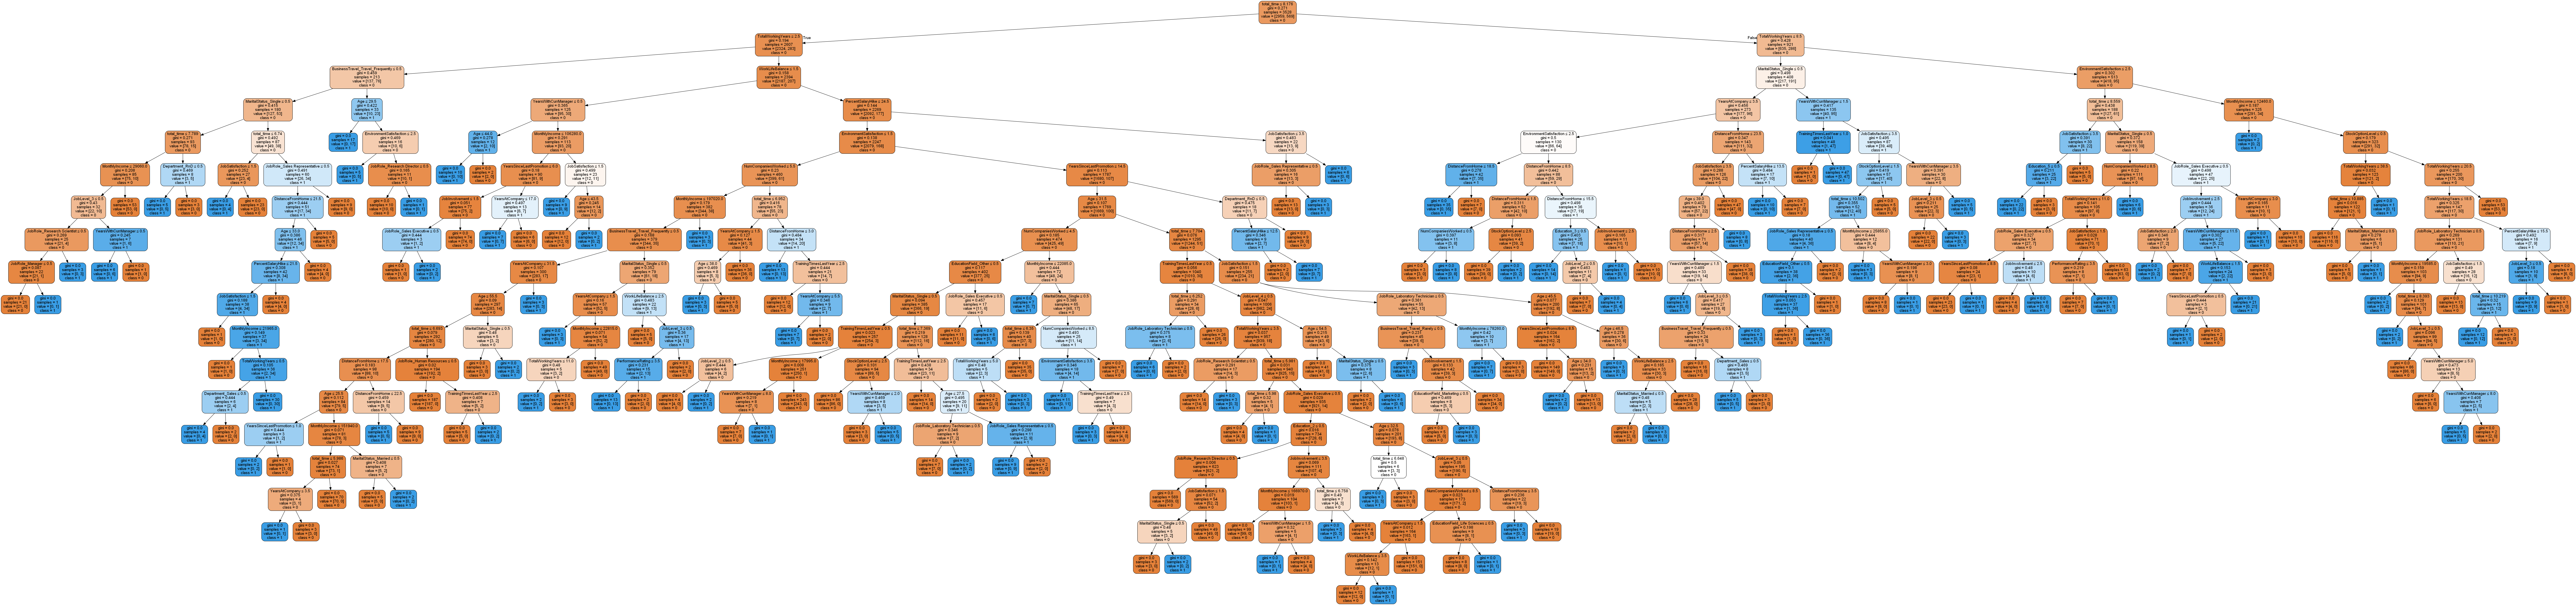

In [82]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('atttree1.png')
Image(graph.create_png()) 

In [114]:
y_pred_clf = clf.predict(x_train) #in-sample prediction
print(confusion_matrix(y_train, y_pred_clf))

[[2959    0]
 [   0  569]]


In [136]:
y_pred_clf_test = clf.predict(x_test) # out-of sample prediction
print(confusion_matrix(y_test, y_pred_clf_test))

[[737   3]
 [ 10 132]]


In [117]:
### missclassification rate 
(13/x_test.shape[0])*100

1.473922902494331

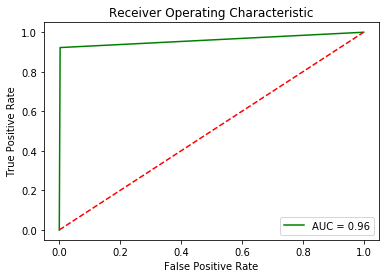

In [118]:
# ROC Curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import matplotlib.pyplot as plt

probs1 = clf.predict_proba(x_test)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

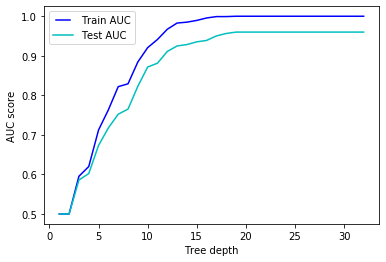

In [119]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix,recall_score

depths = np.linspace(1, 32, 32)
train_results = []
test_results = []

for i in depths:
   tree = DecisionTreeClassifier(max_depth=i,random_state=10)
   tree.fit(x_train, y_train)
   train_pred = tree.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = tree.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(depths, train_results,color='b', label='Train AUC')
line2, = plt.plot(depths, test_results,color='c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [120]:
int(depths[test_results.index(max(test_results))])

19

In [123]:
#pruning the classification tree based on the the above analysis
pruned_clf = treee.DecisionTreeClassifier(max_depth = 19)
pruned_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

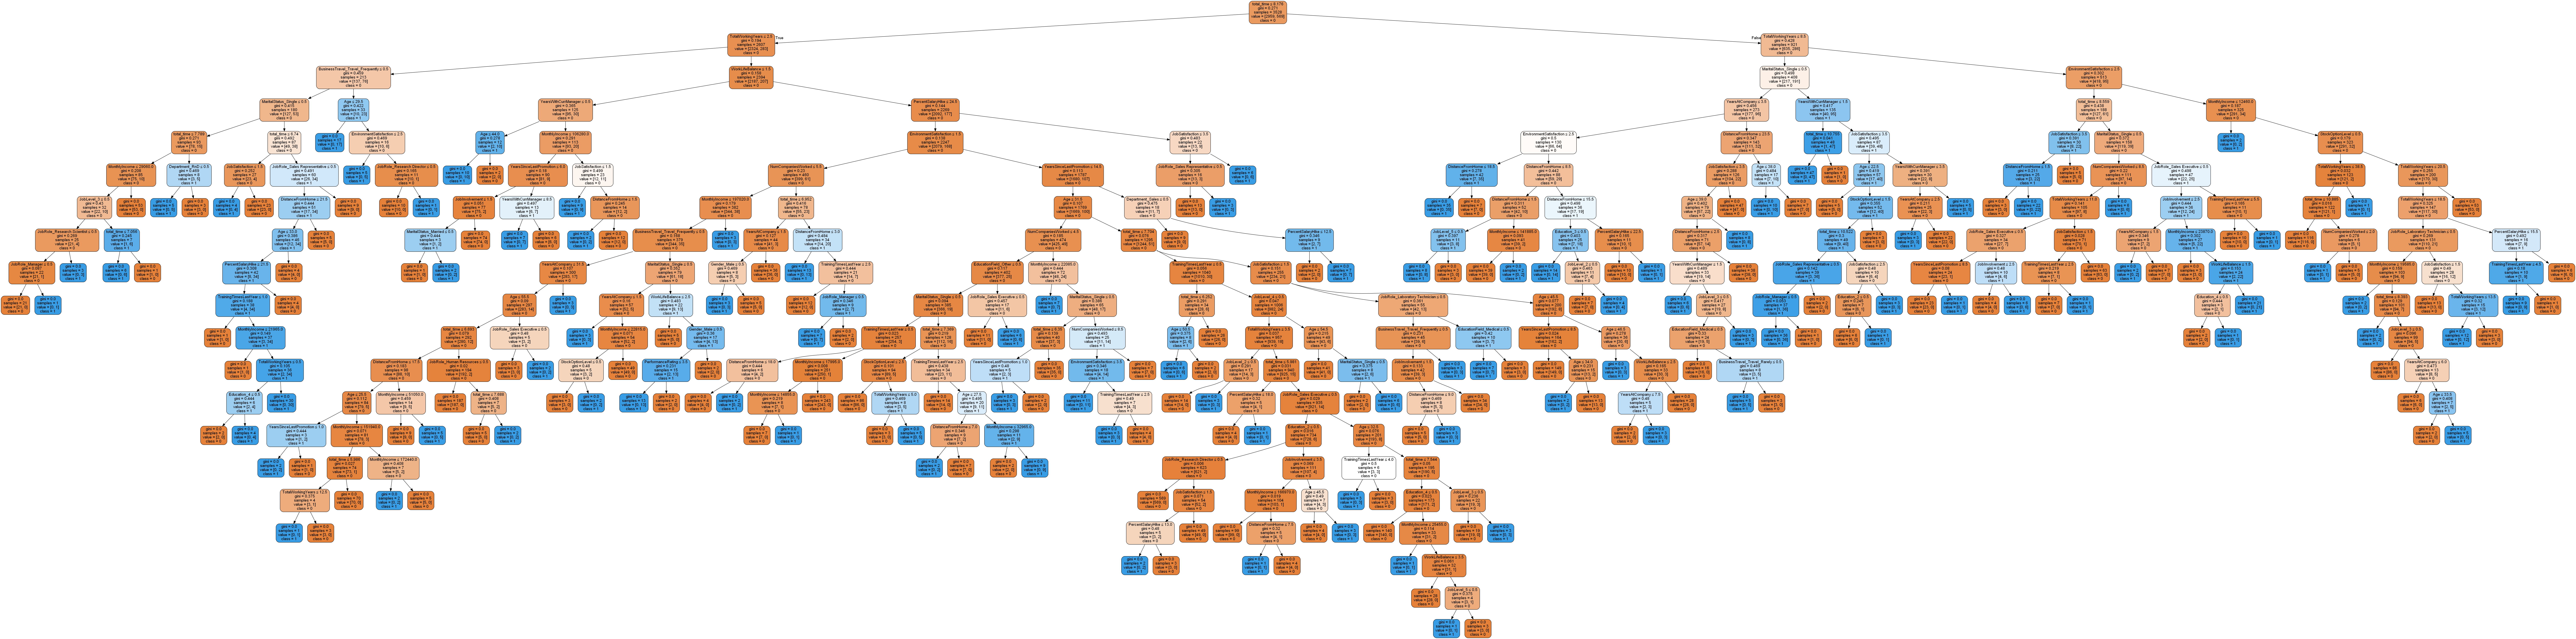

In [124]:
dot_data = StringIO()
export_graphviz(pruned_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prune_tree.png')
Image(graph.create_png()) 

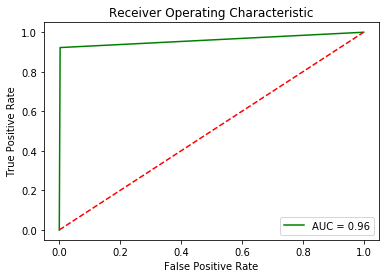

In [125]:
#ROC curve and AUC
probs2 = pruned_clf.predict_proba(x_test)
pred2 = probs1[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr2, tpr2, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc2);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
y_pred_pruned_clf = pruned_clf.predict(x_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_pruned_clf))

[[2959    0]
 [   0  569]]


In [137]:
y_pred_pruned_clf_test = pruned_clf.predict(x_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_pruned_clf_test))

[[733   7]
 [ 11 131]]


In [144]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_depth = 19)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=19, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_pred_rf = rf.predict(x_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_rf))

[[2959    0]
 [   0  569]]


In [146]:
y_pred_rf_test = rf.predict(x_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_rf_test))

[[740   0]
 [  6 136]]


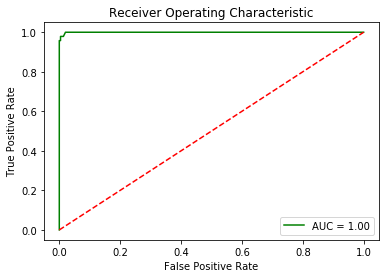

In [151]:
#ROC curve and AUC
probs3 = rf.predict_proba(x_test)
pred3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr3, tpr3, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc3);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

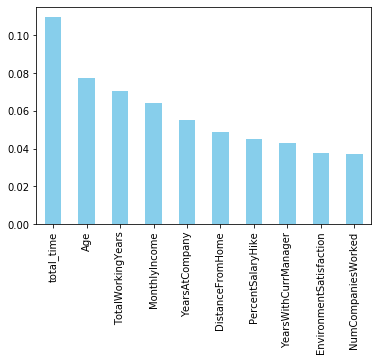

In [158]:
#Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar', colors = "skyblue");

In [159]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [161]:
y_pred_svm = svm.predict(x_train) #in sample prediction
print(confusion_matrix(y_train, y_pred_svm))

[[2945   14]
 [ 546   23]]


In [162]:
y_pred_svm_test = svm.predict(x_test) #out of sample prediction
print(confusion_matrix(y_test, y_pred_svm_test))

[[738   2]
 [141   1]]
